In [1]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

In [2]:
df = pd.read_csv("PEA01_Pop Estimates 1950_2023_Age Group Sex.csv")

In [3]:
df.head(5)

,STATISTIC Label,Year,Age Group,Sex,UNIT,VALUE
0,Population Estimates (Persons in April),1950,Under 1 year,Both sexes,Thousand,61.1
1,Population Estimates (Persons in April),1950,Under 1 year,Male,Thousand,31.4
2,Population Estimates (Persons in April),1950,Under 1 year,Female,Thousand,29.7
3,Population Estimates (Persons in April),1950,0 - 4 years,Both sexes,Thousand,NaN
4,Population Estimates (Persons in April),1950,0 - 4 years,Male,Thousand,NaN


In [4]:
df.tail(5) 

,STATISTIC Label,Year,Age Group,Sex,UNIT,VALUE
5989,Population Estimates (Persons in April),2023,85 years and over,Male,Thousand,33.1
5990,Population Estimates (Persons in April),2023,85 years and over,Female,Thousand,53.9
5991,Population Estimates (Persons in April),2023,All ages,Both sexes,Thousand,5281.6
5992,Population Estimates (Persons in April),2023,All ages,Male,Thousand,2606.2
5993,Population Estimates (Persons in April),2023,All ages,Female,Thousand,2675.4


In [5]:
df.dtypes

STATISTIC Label     object
Year                 int64
Age Group           object
Sex                 object
UNIT                object
VALUE              float64
dtype: object

In [6]:
df = df.drop(["STATISTIC Label"], axis=1)
df.head(5)

,Year,Age Group,Sex,UNIT,VALUE
0,1950,Under 1 year,Both sexes,Thousand,61.1
1,1950,Under 1 year,Male,Thousand,31.4
2,1950,Under 1 year,Female,Thousand,29.7
3,1950,0 - 4 years,Both sexes,Thousand,NaN
4,1950,0 - 4 years,Male,Thousand,NaN


In [7]:
df.shape

(5994, 5)

In [8]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 5)


In [9]:
#We have no duplicate rows. No need to drop dupplicate rows from our df.

In [10]:
df.count() 

Year         5994
Age Group    5994
Sex          5994
UNIT         5994
VALUE        5880
dtype: int64

In [11]:
#We have values in all columns except the last column "VALUE". 
#It seems there are nulls or blanks present on certain rows.

In [12]:
print(df.isnull().sum())

Year           0
Age Group      0
Sex            0
UNIT           0
VALUE        114
dtype: int64


In [13]:
#We have 114 rows with no data/nulls. Looking at the raw data file, there is no "Sex" data for 0-4 year olds. 
#This is likely an artefact of how we collect data on babies for the Census in Ireland in that age range.
#We have complete data for "SEX" however for the age range "1-4". We should use it instead and exclude 0-4 in our analysis potentially.

In [14]:
df = df.dropna() 
df.count()

Year         5880
Age Group    5880
Sex          5880
UNIT         5880
VALUE        5880
dtype: int64

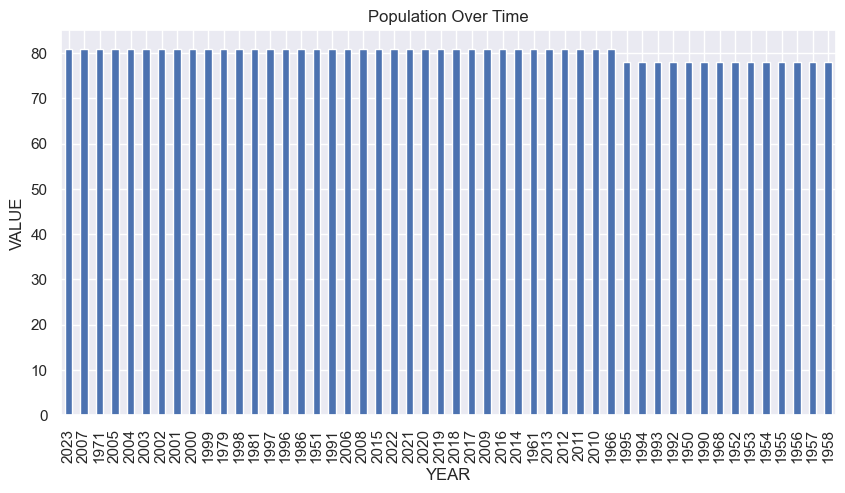

In [21]:
df.Year.value_counts().nlargest(50).plot(kind="bar", figsize=(10,5))
plt.title("Population Over Time")
plt.ylabel("VALUE")
plt.xlabel("YEAR");

In [22]:
df1 = pd.read_csv("PEA15_Annual Pop Change 1951_2023_Birth Death igration.csv")

In [23]:
df1.head(5)

,STATISTIC Label,Year,Component,UNIT,VALUE
0,Annual Population Change,1951,Annual births,Thousand,NaN
1,Annual Population Change,1951,Annual deaths,Thousand,NaN
2,Annual Population Change,1951,Natural increase,Thousand,26.6
3,Annual Population Change,1951,Immigrants,Thousand,NaN
4,Annual Population Change,1951,Emigrants,Thousand,NaN


In [24]:
df1.tail(5) 

,STATISTIC Label,Year,Component,UNIT,VALUE
579,Annual Population Change,2023,Immigrants,Thousand,141.6
580,Annual Population Change,2023,Emigrants,Thousand,64.0
581,Annual Population Change,2023,Net migration,Thousand,77.6
582,Annual Population Change,2023,Population change,Thousand,97.6
583,Annual Population Change,2023,Population,Thousand,5281.6


In [25]:
df1.dtypes

STATISTIC Label     object
Year                 int64
Component           object
UNIT                object
VALUE              float64
dtype: object

In [27]:
df1 = df1.drop(["STATISTIC Label"], axis=1)
df1.head(5)

,Year,Component,UNIT,VALUE
0,1951,Annual births,Thousand,NaN
1,1951,Annual deaths,Thousand,NaN
2,1951,Natural increase,Thousand,26.6
3,1951,Immigrants,Thousand,NaN
4,1951,Emigrants,Thousand,NaN


In [28]:
df.shape

(5880, 5)

In [29]:
duplicate_rows_df1 = df1[df1.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 5)


In [30]:
#We have no duplicate rows. No need to drop dupplicate rows from our df1.

In [31]:
df1.count() 

Year         584
Component    584
UNIT         584
VALUE        440
dtype: int64

In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       584 non-null    int64  
 1   Component  584 non-null    object 
 2   UNIT       584 non-null    object 
 3   VALUE      440 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 18.4+ KB


In [33]:
df1.isnull().any()

Year         False
Component    False
UNIT         False
VALUE         True
dtype: bool

In [34]:
#Verified nulls only in VALUE column

In [35]:
df1.isnull().sum()

Year           0
Component      0
UNIT           0
VALUE        144
dtype: int64

In [36]:
#We have 144 null results

In [37]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [38]:
#Adding Missingno library to help me understand these nulls better

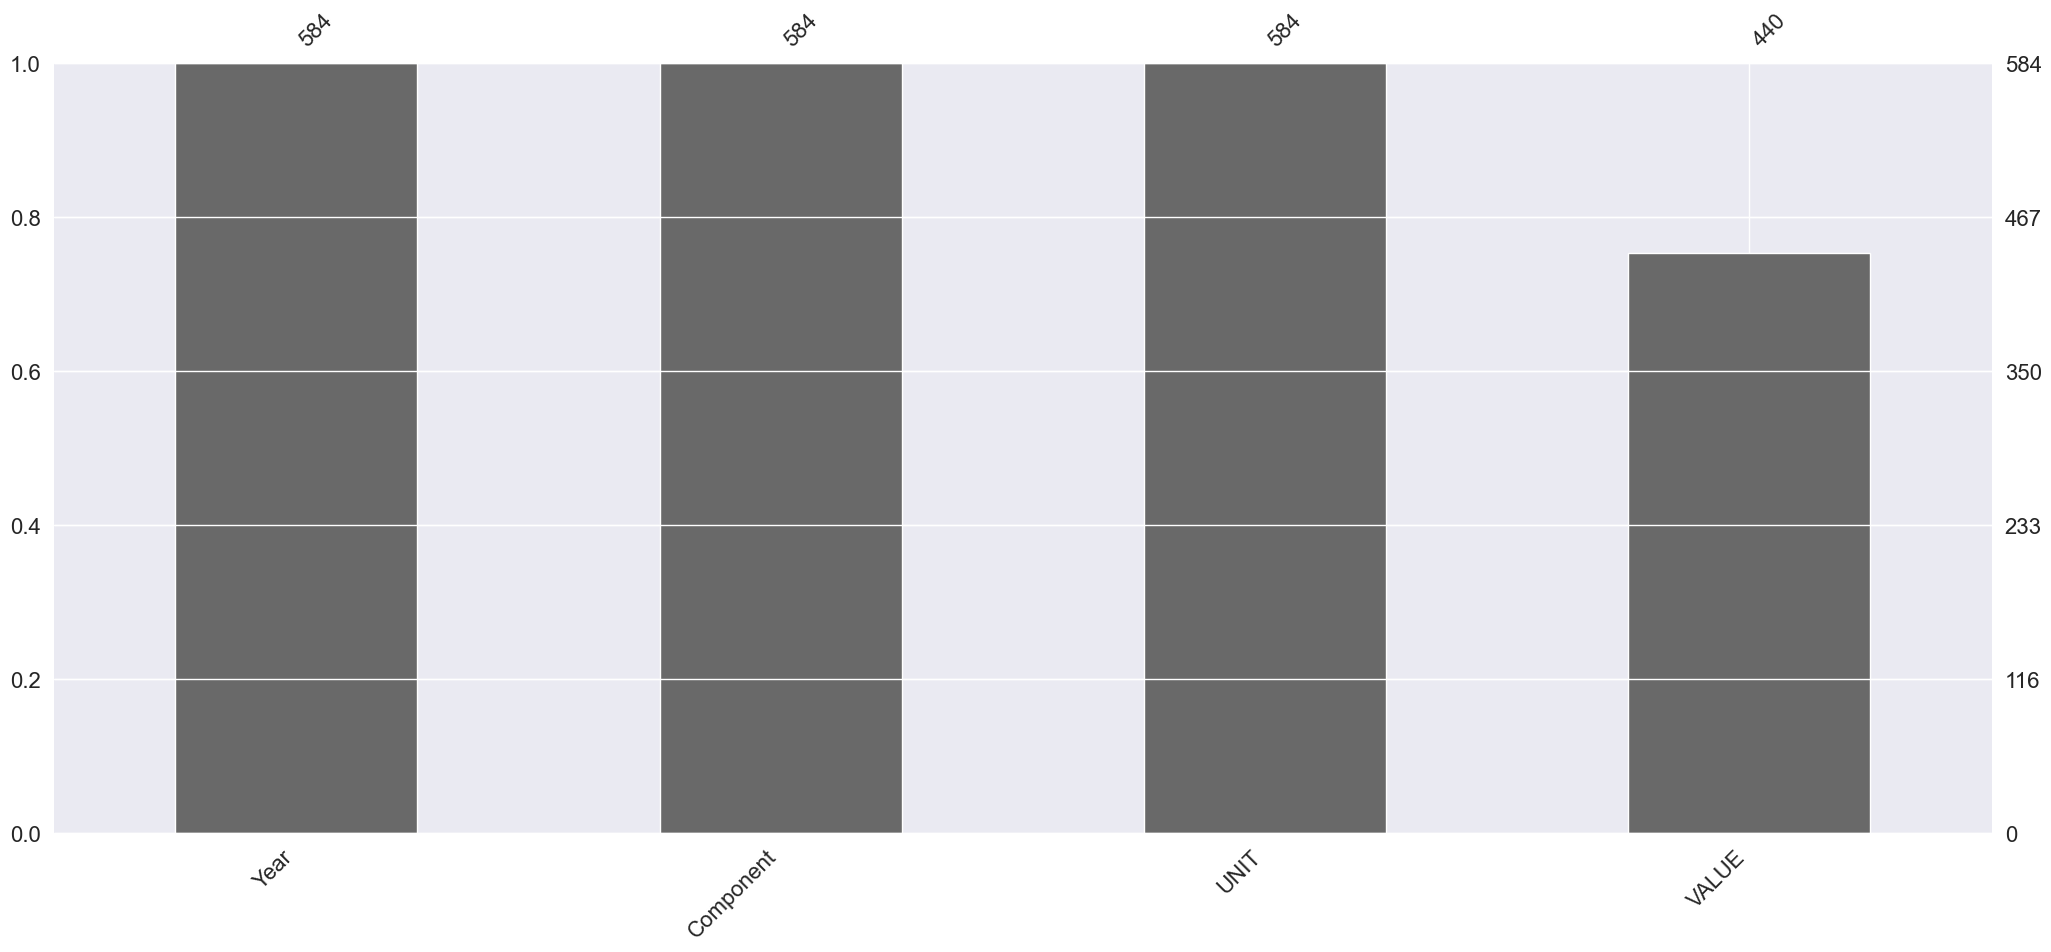

In [39]:
import missingno as mi
mi.bar(df1)
plt.show()

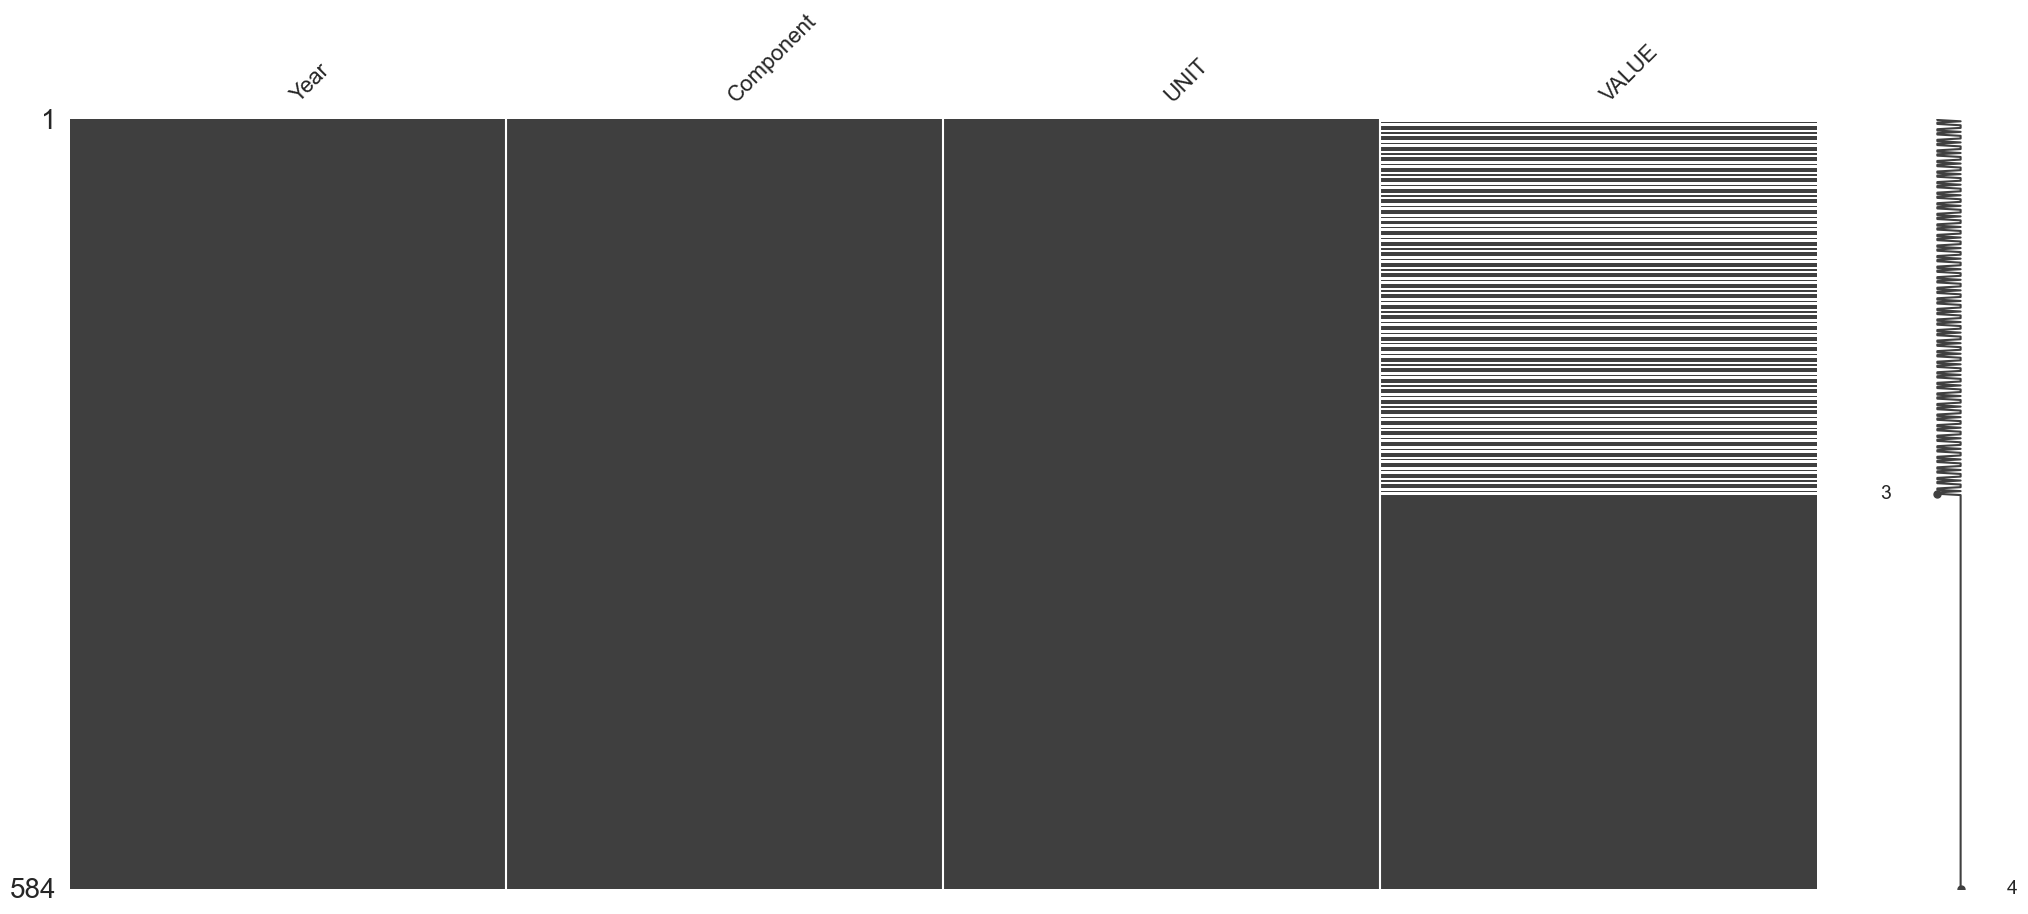

In [41]:
mi.matrix(df1)
plt.show()

In [42]:
#Okay we can now see the nulls are distributed in the lower years of data rows. This makes sense functionally that maybe this data point was only collected after a certain point in time. This is guiding me to not use data prior to a certain cut-off point to avoid nulls.

In [51]:
df1_null = df1[df1['VALUE'].isnull()]
table_null = df1_null.pivot_table(index='Year', values='VALUE', aggfunc='count')

In [53]:
table_null

,VALUE
Year,
1951,0
1952,0
1953,0
1954,0
1955,0
1956,0
1957,0
1958,0
1959,0


In [54]:
#Now we know the nulls are present in all historical rows up to 1986 inclusive. 
#Let's drop these years' data from the df now.

In [56]:
df1['Year'] = pd.to_datetime(df1['Year'])
mask = df1['Year'].dt.year > 1986

In [57]:
filtered_df1 = df1[mask]

In [59]:
filtered_df1.isnull().sum()

Year         0.0
Component    0.0
UNIT         0.0
VALUE        0.0
dtype: float64

In [60]:
#We've cut out the rows for years pror to 1986 and we now have no nulls in our new df called "filtered_df1"

In [61]:
#We now have 2 data sets with correct data types and no nulls ready for further processing and analysis.